In [9]:
!pip install opencv-python ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 953.2 kB/s eta 0:00:00
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.1/869.1 kB 6.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 MB 47.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.1 MB/s eta 0:00:0000:01
Using cached py_cpuinfo-9.0.0-py3-none-any.whl (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 34.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


/var/folders/2k/pbhl8dtn54gfrh1kmc9cd5240000gp/T/ipykernel_1076/1331134815.py:39: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  plot = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8,
/var/folders/2k/pbhl8dtn54gfrh1kmc9cd5240000gp/T/ipykernel_1076/1331134815.py:39: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  plot = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8,


KeyboardInterrupt: 

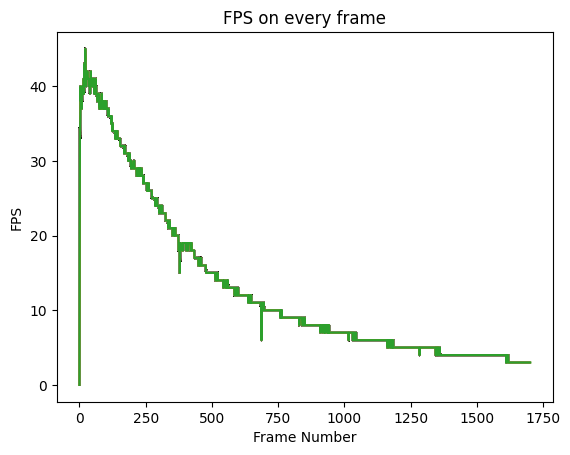

In [11]:
#example using movie and opencv with matplotlib
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

fig = plt.figure()
vid = cv2.VideoCapture('PF_allsky_2022_03_05.mp4')
pTime = 0
frame_number = 0
frame_numbers_list = [0]
fps_list = [0]

while True:
    # Reading frame from video or webcam
    # and resizing to match when combining them
    success, img = vid.read()
    img = cv2.resize(img, (640, 480))
        
    # Calculating the fps
    cTime = time.time()
    fps = 1 / (cTime - pTime)
    pTime = cTime
        
    # Append the current frame number and FPS to their respective lists
    # and increment frame number
    frame_numbers_list.append(frame_number)
    fps_list.append(int(fps))
    frame_number += 1
        
    # Plotting fps data
    plt.plot(frame_numbers_list, fps_list)
    plt.title("FPS on every frame")
    plt.ylabel("FPS")
    plt.xlabel("Frame Number")

    fig.canvas.draw()
    # converting matplotlib figure to Opencv image
    plot = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8,
                             sep='')
    plot = plot.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plot = cv2.cvtColor(plot, cv2.COLOR_RGB2BGR)
        
    # Combining Original Frame and Plot Image
    result_img = np.hstack([img, plot])

    # Displaying the Combined Image:
    cv2.imshow("Image", result_img)
    cv2.waitKey(1)